##                                            ABOUT DATASET

#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

#### importing libraries

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [195]:
df = pd.read_csv("bigdatamart_Train.csv")

In [196]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [197]:
dftest.head(5)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,0.007565,Snack Foods,107.8622,1999,Tier 1,Supermarket Type1
1,FDW14,0.038428,Dairy,87.3198,2007,Tier 2,Supermarket Type1
2,NCN55,0.099575,Others,241.7538,1998,Tier 3,Grocery Store
3,FDQ58,0.015388,Snack Foods,155.0340,2007,Tier 2,Supermarket Type1
4,FDY38,0.118599,Dairy,234.2300,1985,Tier 3,Supermarket Type3


#### The target variable("Item_Outlet_Sales") is continuous so its a Regression problem

#### Shape of train dataset and test dataset

In [198]:
print("Shape of train dataset is ",df.shape)

Shape of train dataset is  (8523, 12)


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### In the train dataset Item_Weight(float:dtype) and Outlet_Size(object:dtype) have null values

#### Exploring each feature variable

In [201]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Replacing 'LF' and 'low fat' as 'Low Fat' and 'reg' as 'regular'

In [202]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [200]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [203]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [204]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [205]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Handling the missing values
#### On Item_Weight replacing the null values with mean
#### In the column 'Outlet_Size' replacing null values with mode

In [206]:
df["Item_Weight"] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [207]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Converting categorical variables into numerical

In [210]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,664,4,5592,9,4,1,0,1,2540
1,8,57,1,880,14,473,3,8,1,2,2,422
2,662,376,0,715,10,2901,9,4,1,0,1,1639
3,1121,393,1,0,6,4227,0,3,1,2,0,670
4,1297,265,0,0,9,627,1,1,0,2,1,865


### EDA

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

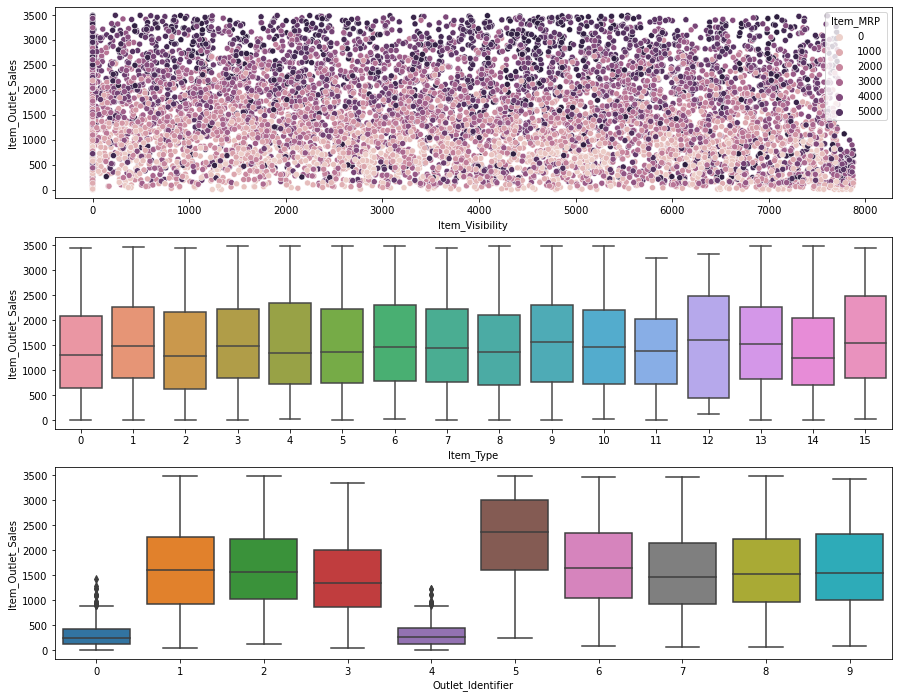

In [211]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

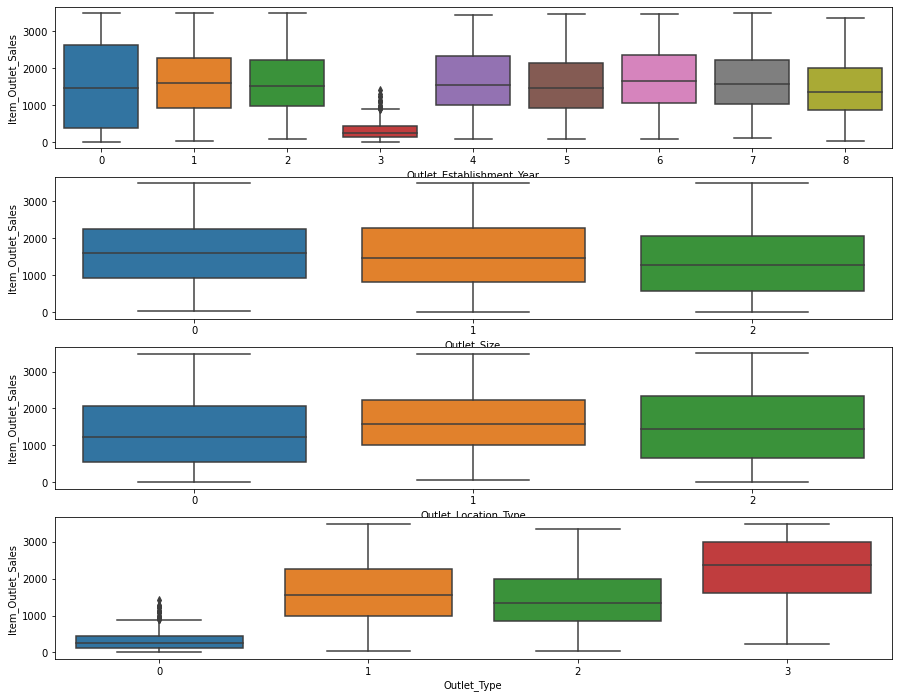

In [212]:
fig,axes=plt.subplots(4,1,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[2],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[3],data=df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

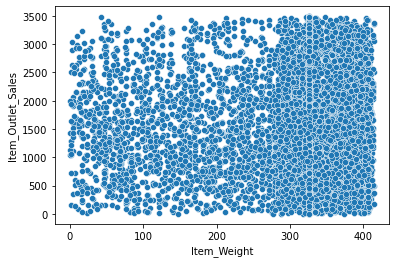

In [214]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

#### From EDA its clear that Item_Identifier,Item_Visibility and Item_Weight doesn't have any relation with Sales

#### Checking correlation for better clarity

In [215]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.028921,-0.114660,-0.029999,-0.017973,0.014329,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.005916
Item_Weight,0.028921,1.000000,-0.022285,-0.008127,0.033651,0.022599,-0.009742,-0.086903,0.008921,0.015726,0.051108,0.012597
Item_Fat_Content,-0.114660,-0.022285,1.000000,0.053610,-0.139434,0.006624,0.000764,0.002447,-0.000622,-0.001598,0.002199,0.019345
Item_Visibility,-0.029999,-0.008127,0.053610,1.000000,-0.043491,0.005482,-0.073962,-0.053923,0.048700,-0.018067,-0.125695,-0.109471
Item_Type,-0.017973,0.033651,-0.139434,-0.043491,1.000000,0.038449,0.001656,0.006527,-0.001859,0.003084,0.003053,0.020094
Item_MRP,0.014329,0.022599,0.006624,0.005482,0.038449,1.000000,0.003005,0.003730,0.006802,0.000828,-0.001828,0.573191
Outlet_Identifier,-0.008602,-0.009742,0.000764,-0.073962,0.001656,0.003005,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.200320
Outlet_Establishment_Year,-0.014288,-0.086903,0.002447,-0.053923,0.006527,0.003730,-0.030969,1.000000,0.070786,0.042005,-0.040040,0.024477
Outlet_Size,0.001389,0.008921,-0.000622,0.048700,-0.001859,0.006802,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.099278
Outlet_Location_Type,0.003656,0.015726,-0.001598,-0.018067,0.003084,0.000828,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.074671


#### Item_MRP is correlated with sales

#### Statistical analysis of the data

In [216]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,298.756776,0.352693,3709.198639,7.226681,2941.096562,4.722281,3.790684,1.170832,1.112871,1.201220,1523.114279
std,449.222377,95.451067,0.477836,2396.606857,4.209990,1675.483234,2.837201,2.730322,0.600327,0.812757,0.796459,918.266722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.500000,285.000000,0.000000,1595.500000,4.000000,1535.500000,2.000000,1.000000,1.000000,0.000000,1.000000,749.500000
50%,783.000000,326.000000,0.000000,3708.000000,6.000000,2949.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1432.000000
75%,1167.000000,361.000000,1.000000,5789.500000,10.000000,4351.500000,7.000000,6.000000,2.000000,2.000000,1.000000,2229.000000
max,1558.000000,415.000000,1.000000,7879.000000,15.000000,5937.000000,9.000000,8.000000,2.000000,2.000000,3.000000,3492.000000


In [219]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                 -1.425559
Item_Fat_Content             0.616705
Item_Visibility              0.021566
Item_Type                    0.101655
Item_MRP                     0.000902
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            0.268806
dtype: float64

#### Visualizing data distribution

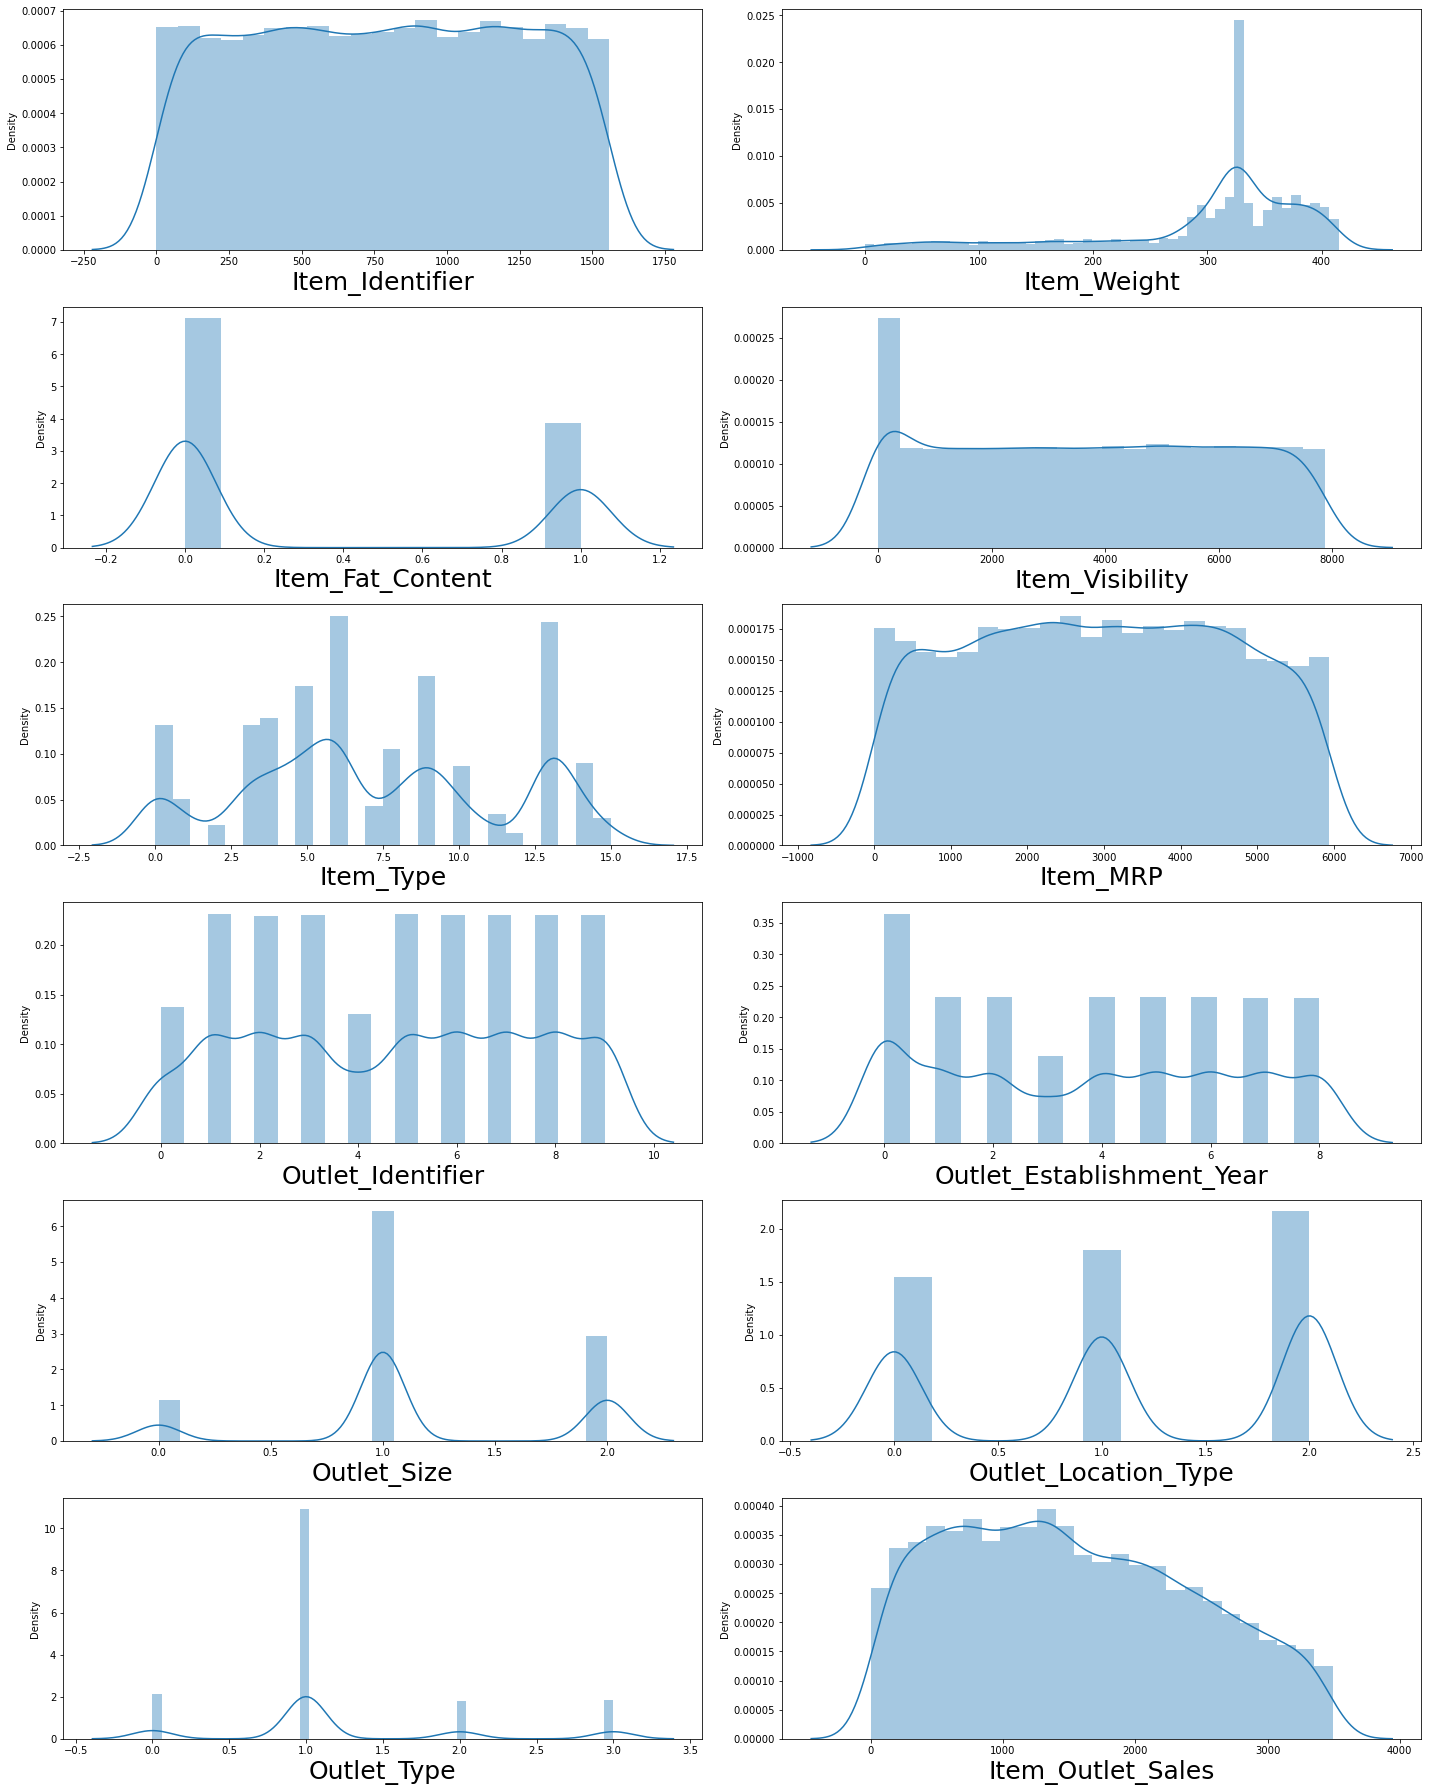

In [218]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

### DATA CLEANING

In [220]:
drop = pd.DataFrame([['Item_Weight','0.013','1.42'],['Item_Visibilty','-0.10','0.02'],['Item_Identifier','0.005','-0.008']],columns=['Features','Correlation','Skewness'])
drop

,Features,Correlation,Skewness
0,Item_Weight,0.013,1.42
1,Item_Visibilty,-0.10,0.02
2,Item_Identifier,0.005,-0.008


In [222]:
df = df.drop(columns=['Item_Weight','Item_Visibility','Item_Identifier'])

In [223]:
df.head(5)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,4,5592,9,4,1,0,1,2540
1,1,14,473,3,8,1,2,2,422
2,0,10,2901,9,4,1,0,1,1639
3,1,6,4227,0,3,1,2,0,670
4,0,9,627,1,1,0,2,1,865


#### Checking for outliers

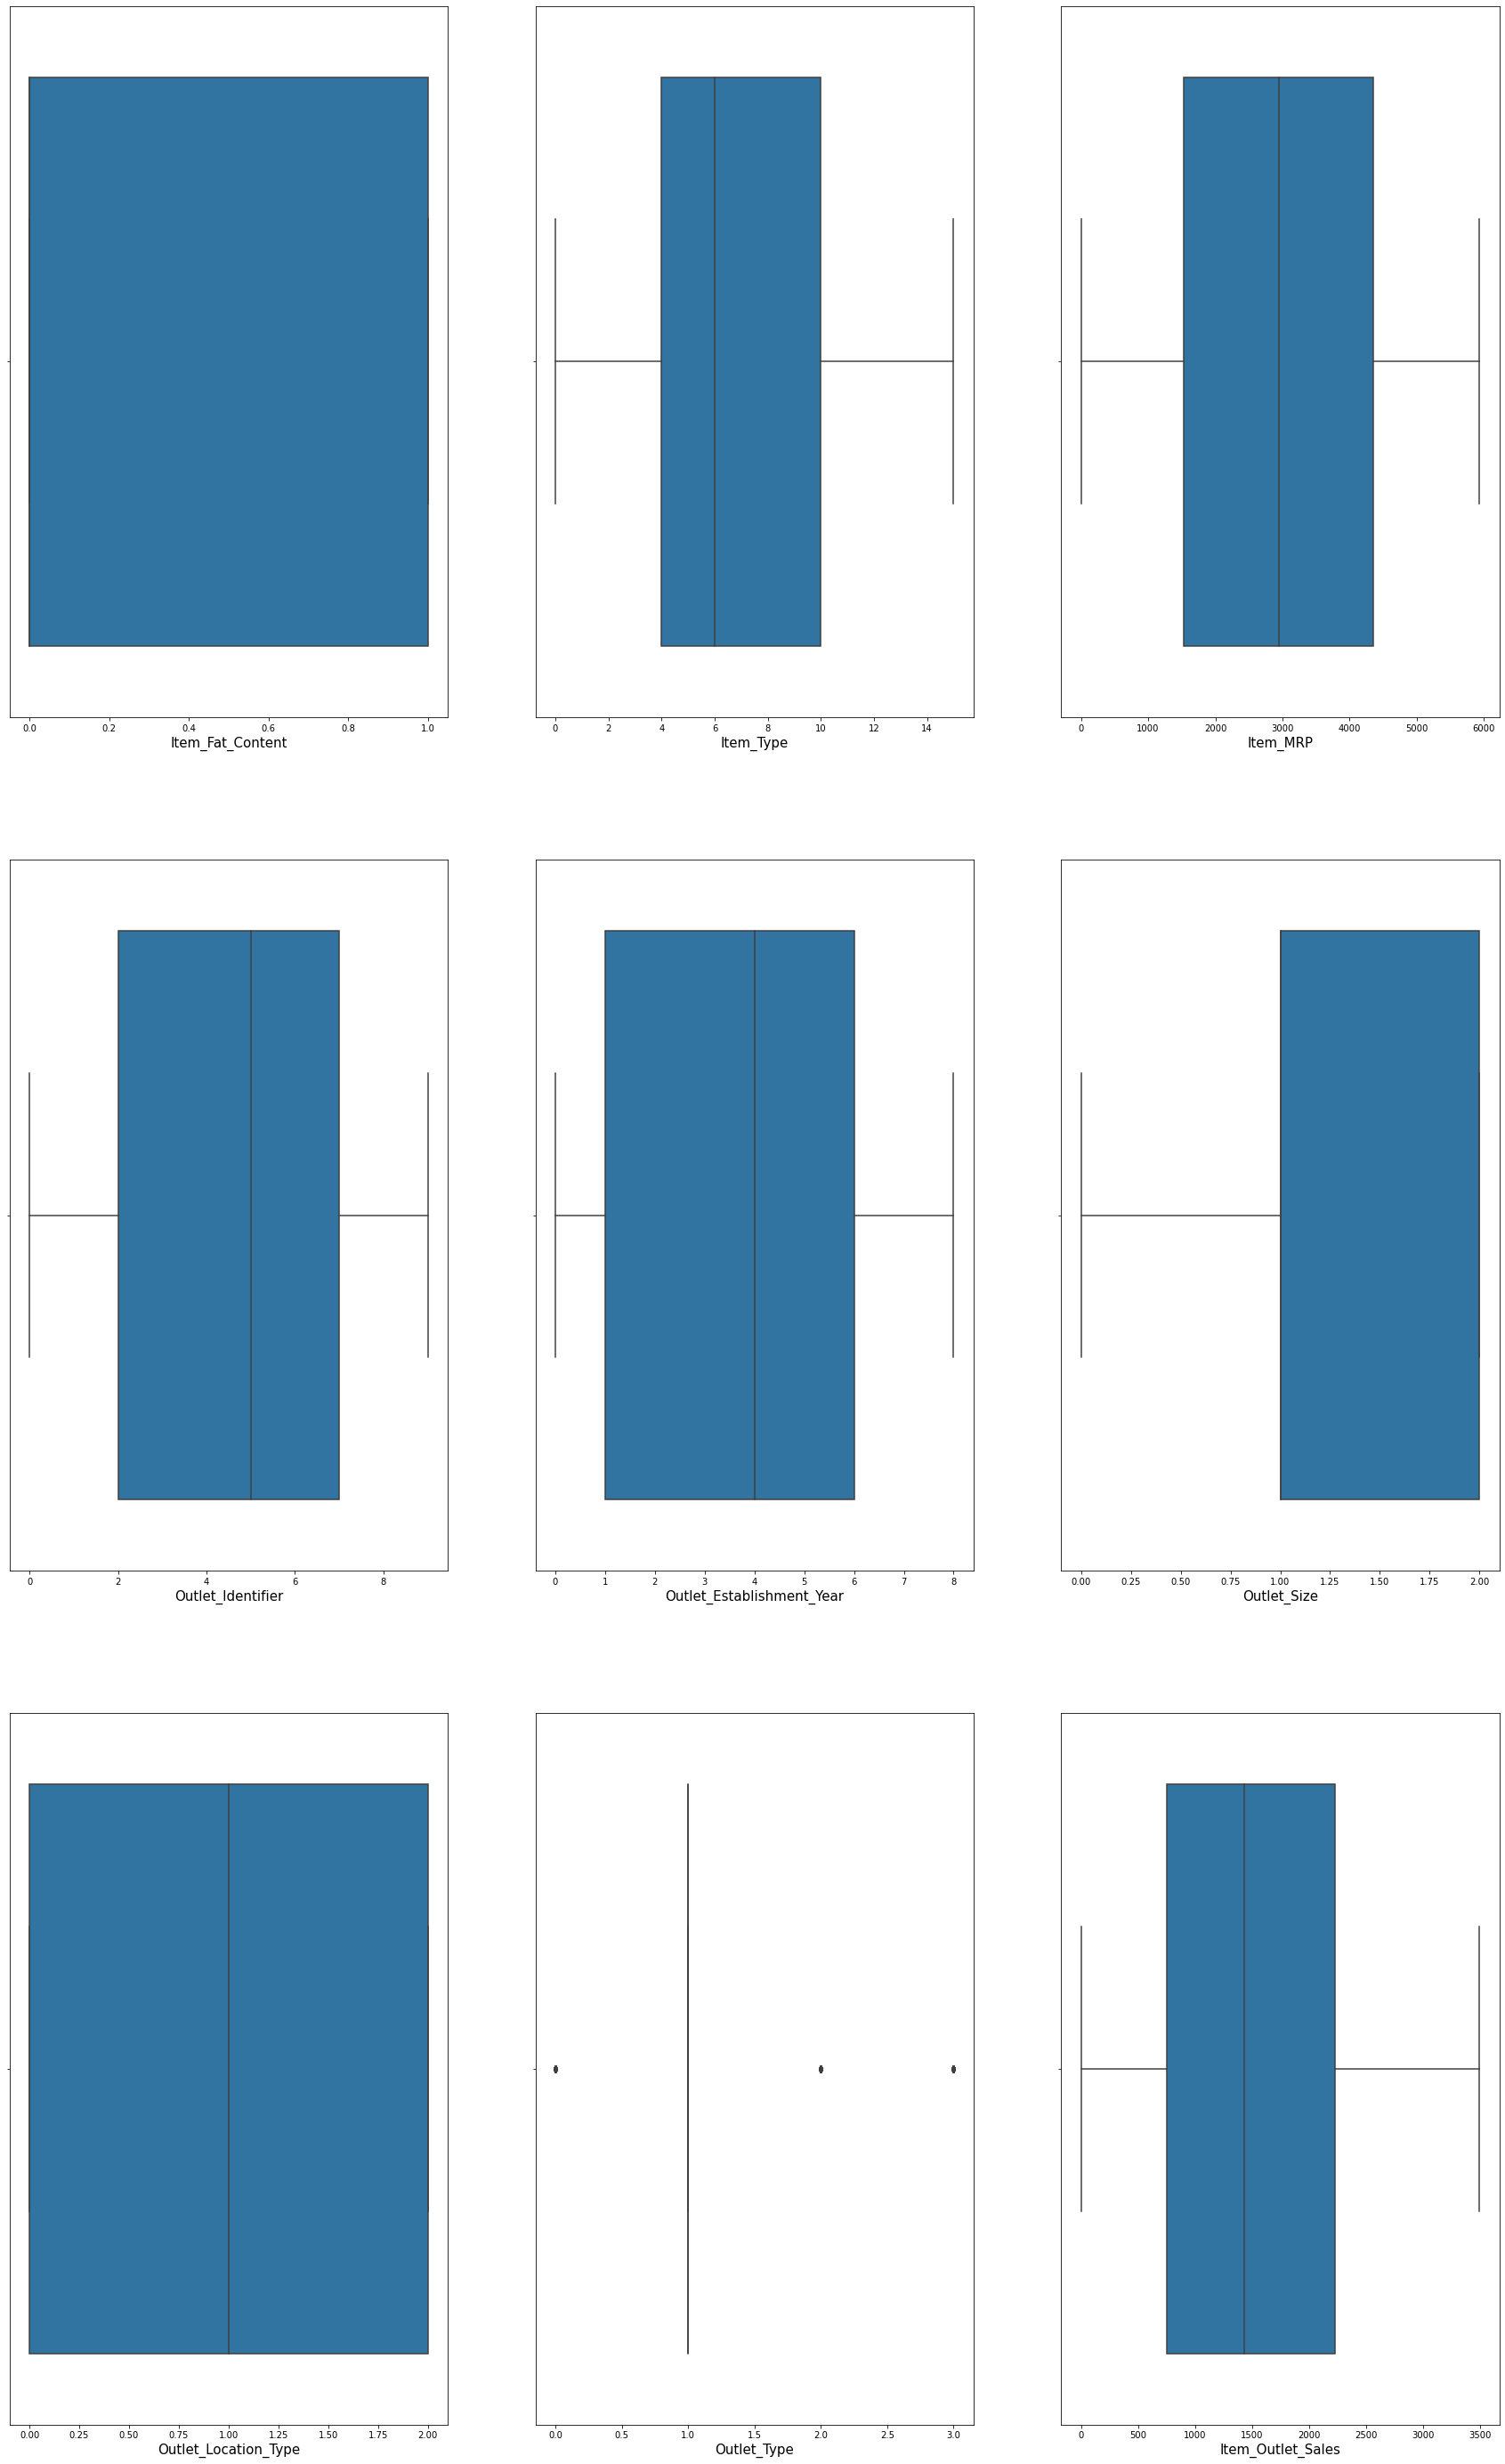

In [225]:
plt.figure(figsize=(30,50))
gr = 1
for column in df:
    if gr<=9:
        ax = plt.subplot(3,3,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Now the data doesn't have any outliers

#### Splitting dataset into x and y

In [226]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

#### Removing skewness

In [228]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.73814723, -0.71234723,  1.44649233, ..., -0.29329517,
        -1.37384276, -0.12348771],
       [ 1.35474328,  1.50465979, -1.58277683, ..., -0.29329517,
         1.08832445,  1.04059102],
       [-0.73814723,  0.68439021,  0.07089076, ..., -0.29329517,
        -1.37384276, -0.12348771],
       ...,
       [-0.73814723,  0.24699567, -0.95225211, ...,  1.390694  ,
        -0.13111325, -0.12348771],
       [ 1.35474328,  1.30530437, -0.55341517, ..., -0.29329517,
         1.08832445,  1.04059102],
       [-0.73814723,  1.50465979, -1.1366362 , ...,  1.390694  ,
        -1.37384276, -0.12348771]])

In [229]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Item_Fat_Content             0.616705
Item_Type                   -0.164574
Item_MRP                    -0.287450
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.219241
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

### Scaling the data

In [231]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)

#### Finding the best random state

In [232]:
from sklearn.linear_model import LinearRegression
max_score = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = lr.score(x_train,y_train)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.5954815976509724 when 231 is the random state


In [233]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 231)

#### i) Linear regression

In [234]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset =  0.5954815976509724
Score in testing dataset =  0.5420048946710442
MAE is :  484.83811746703805
MSE is : 368352.01088146755
RMSE is : 606.9201025517837


#### ii) Decision Trees Regressor

In [235]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  0.9995211557936079
Score in testing dataset is  0.25678970070484963
MAE is :  576.1661191928672
MSE is : 597742.2139840451
RMSE is : 773.1379010138133


#### iii) Random Forest Regressor

In [236]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9454245241376533
Score in testing dataset is  0.5636072428410153
MAE is :  447.8059824808384
MSE is : 350977.8767573591
RMSE is : 592.4338585507745


#### iv) Gradient Boosting Regressor

In [237]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in testing dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.6933094535422747
Score in testing dataset is  0.6275307716265603
MAE is :  418.53445588098253
MSE is : 299566.0601313219
RMSE is : 547.3262830627832


#### v) SVR

In [238]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in testing dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Score in training dataset is  0.24840967927994329
Score in testing dataset is  0.24023481445402828
MAE is :  649.427770885955
MSE is : 611056.8227417611
RMSE is : 781.7012362416738


#### vi) XGBRegressor

In [240]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in testing dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("R2 score is : ",r2_score(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.8372974072173573
Score in testing dataset is  0.5779007925930966
MAE is :  442.6713080393882
MSE is : 339481.9945250986
R2 score is :  0.5779007925930966
RMSE is : 582.6508341409103


#### Checking Cross validation Score

In [241]:
cvs = cross_val_score(lr,x_scaled,y,cv=10,scoring='r2')
cvs = np.mean(cvs)
print("Cross validation score of Linear Regression model is : ",cvs)

Cross validation score of Linear Regression model is :  0.5813612406147681


In [242]:
cvs = cross_val_score(dt,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  0.29839019546760637


In [243]:
cvs = cross_val_score(rf,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  0.5980431157321588


In [244]:
cvs = cross_val_score(gbr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of GradientBoostingRegressor model is : ",cvs)

Cross validation score of GradientBoostingRegressor model is :  0.6575055995360127


In [245]:
cvs = cross_val_score(svr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of SVR model is : ",cvs)

Cross validation score of SVR model is :  0.2768691814673323


In [247]:
cvs = cross_val_score(xgbr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of XGBRegressor model is : ",cvs)

Cross validation score of XGBRegressor model is :  0.6190122784276081


In [248]:
models = pd.DataFrame([["Linear Regression","54.20","58.14","3.94"],["DecisionTreeRegressor","25.68","29.83","4.15"],["RandomForestRegressor","56.36","59.80","3.44"],["GradientBoostingRegressor","62.75","65.75","3"],["SVR","24.02","27.69","3.67"],["XGBRegressor","57.79","61.90","4.11"]],columns=["Model","Score","Cross Validation Score","Difference"])
models

,Model,Score,Cross Validation Score,Difference
0,Linear Regression,54.20,58.14,3.94
1,DecisionTreeRegressor,25.68,29.83,4.15
2,RandomForestRegressor,56.36,59.80,3.44
3,GradientBoostingRegressor,62.75,65.75,3
4,SVR,24.02,27.69,3.67
5,XGBRegressor,57.79,61.90,4.11


#### GradientBoostingRegressor is the best model 

#### HyperParameter Tuning

In [264]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':np.arange(0.05,0.23),
          'n_estimators':[10,80,10],
          'max_depth':[2,10,2],
          'min_samples_leaf':[1,10,2]
         }
grid = GridSearchCV(estimator = gbr,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 80}


In [263]:
gbr = GradientBoostingRegressor(learning_rate=0.2,max_depth=2,min_samples_leaf=1,n_estimators=80)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in testing dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset is  0.6863203083532915
Score in testing dataset is  0.6286402471161381
MAE is :  417.79705986757756
MSE is : 298673.7415828166
RMSE is : 546.5105136983337


#### After HPT the score is 62.86% 

#### LOADING TEST DATASET

In [276]:
dt = pd.read_csv("bigdatamart_Test.csv")

In [277]:
dt = dt.drop(columns=['Item_Weight','Item_Visibility','Item_Identifier'])
dt.head(3)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,Low Fat,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [278]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           5681 non-null   object 
 1   Item_Type                  5681 non-null   object 
 2   Item_MRP                   5681 non-null   float64
 3   Outlet_Identifier          5681 non-null   object 
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Size                4075 non-null   object 
 6   Outlet_Location_Type       5681 non-null   object 
 7   Outlet_Type                5681 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 355.2+ KB


In [279]:
dt["Outlet_Size"] = dt["Outlet_Size"].fillna(dt["Outlet_Size"].mode()[0])

In [280]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [281]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in dt:
    dt[column] = label_enc.fit_transform(dt[column])
dt.head(2)

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,13,1460,9,4,1,0,1
1,4,4,965,2,7,1,1,1


In [282]:
dt_new = power_transform(dt,method='yeo-johnson')
dt_new

array([[-0.5240889 ,  1.30168635, -0.4793085 , ..., -0.29345691,
        -1.37374464, -0.12353311],
       [ 3.19413231, -0.71243299, -0.9232237 , ..., -0.29345691,
        -0.13101959, -0.12353311],
       [-0.5240889 ,  0.89224046,  1.3920729 , ..., -0.29345691,
         1.08829997, -1.91575348],
       ...,
       [-0.5240889 ,  0.24455306, -0.23837363, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 1.01563473, -0.9780988 ,  1.14603342, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 1.01563473, -0.9780988 , -1.07903259, ..., -0.29345691,
        -0.13101959, -0.12353311]])

#### Converting to dataframe

In [283]:
dt_new = pd.DataFrame(dt_new,columns=x.columns)
dt_new.skew()

Item_Fat_Content             0.032646
Item_Type                   -0.167431
Item_MRP                    -0.275925
Outlet_Identifier           -0.214064
Outlet_Establishment_Year   -0.219163
Outlet_Size                 -0.042981
Outlet_Location_Type        -0.220642
Outlet_Type                  0.007830
dtype: float64

### Scaling dt

In [284]:
scale = StandardScaler()
dt_scaled = scale.fit_transform(dt_new)

In [285]:
prediction = gbr.predict(dt_scaled)

In [288]:
predict=pd.DataFrame({'Item_Outlet_Sales':prediction})
predict

,Item_Outlet_Sales
0,1334.050281
1,1152.974445
2,499.731754
3,1806.357771
4,2951.790264
...,...
5676,1618.892055
5677,1796.320262
5678,1407.766361
5679,2420.183038


#### Model Saving

In [290]:
filename = 'bigdatamart.pkl'
pickle.dump(lr,open(filename,'wb'))